In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
print(torch.__version__)
print(torch.cuda.is_available())

1.8.1
True


In [2]:
import os
import glob
# dataset
validation_dir=r'C:\Users\User\chou_paper_data\flower_data\valid'  # for predict
train_dir=r'C:\Users\User\chou_paper_data\flower_data\train'  # for train
test_dir=r'C:\Users\User\chou_paper_data\flower_data\test'  # none label
batch_size=32
img_size=(227, 227)
freeze_layers_number=0
classes=sorted([o for o in os.listdir(train_dir)])  # 根据文件名分类
import requests
import json
file_location=r'C:\Users\User\chou_paper_data\flower_data\cat_to_name.json'
f=open(file_location)
class_names=json.loads(f.read())
class_names = {int(k):v for k,v in class_names.items()}

nb_train_samples = len(glob.glob(train_dir + '/*/*.*'))  # number of training data
nb_validation_samples = len(glob.glob(validation_dir + '/*/*.*'))  # number of validing data
nb_test_samples = len(glob.glob(test_dir + '/*.*'))  # number of test data
print(nb_train_samples,nb_validation_samples,nb_test_samples,'total=',nb_train_samples+nb_validation_samples+nb_test_samples)

6552 818 819 total= 8189


In [3]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),                                                                            
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [4]:
dataset=torchvision.datasets.ImageFolder(
    root=train_dir,
    transform=transform)
n = len(dataset)  # total number of examples
n_test = int(0.2 * n)  # take ~10% for test
validation_dataset = torch.utils.data.Subset(dataset, range(n_test))  # take first 10%
train_dataset = torch.utils.data.Subset(dataset, range(n_test, n))  # take the rest 

trainloader=torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True,num_workers=2)
validloader=torch.utils.data.DataLoader(validation_dataset,batch_size=batch_size,shuffle=True,num_workers=2)

pred_dataset=torchvision.datasets.ImageFolder(
    root=validation_dir,
    transform=transform)
predloader=torch.utils.data.DataLoader(pred_dataset,batch_size=batch_size,shuffle=True,num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


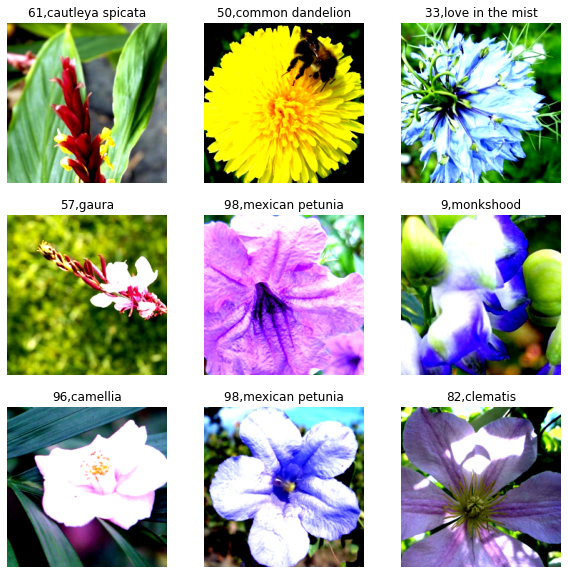

In [5]:
dataiter=iter(trainloader)
datas,labels = dataiter.next()
true_labels=[np.argmax(labels)for labels in labels]
plt.figure(figsize=(10, 10))
for i in range(9):
    ax=plt.subplot(3, 3, i + 1)
    datas[i]=datas[i] / 2 + 0.5
    plt.imshow(np.transpose(datas[i], (1, 2, 0)))
    plt.title(classes[labels[i]]+','+class_names[int(classes[labels[i]])])
    plt.axis("off")

In [55]:
#Now using the AlexNet
AlexNet_model = models.alexnet(pretrained=True)
#Model description
AlexNet_model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [56]:
AlexNet_model.classifier[6] = nn.Linear(4096,len(classes))
AlexNet_model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [57]:
#Instantiating CUDA device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#Verifying CUDA
print(device)
#Move the input and AlexNet_model to GPU for speed if available
AlexNet_model.to(device)

cuda:0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [58]:
import torch.optim as optim
import torch.nn as nn
#Loss
criterion = nn.CrossEntropyLoss()
#Optimizer(SGD)
optimizer = optim.SGD(AlexNet_model.parameters(), lr=1e-4, momentum=0.7)
#
num_epochs=100
for epoch in range(num_epochs):  # loop over the dataset multiple times
    correct=0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        output = AlexNet_model(inputs)
        _, predicted = torch.max(output,1)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        correct += (predicted == labels).float().sum()
        # print statistics
    accuracy = 100 * correct / len(train_dataset)
    val_correct=0.0
    for i, data in enumerate(validloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        output = AlexNet_model(inputs)
        _, predicted = torch.max(output,1)
        val_loss = criterion(output, labels)
        val_loss.backward()
        optimizer.step()
        val_correct += (predicted == labels).float().sum()
        # print statistics
    val_accuracy = 100 * val_correct / len(validation_dataset)
    print("Epoch {}/{}, Loss: {:.6f}, Accuracy: {:.3f}, val_Loss {:.6f}, val_accuracy: {:.3f}".format(epoch+1,num_epochs, loss.item(),accuracy,val_loss.item(),val_accuracy))
print('Finished Training of AlexNet')

Epoch 1/100, Loss: 2.996019, Accuracy: 17.799, val_Loss 3.465225, val_accuracy: 7.023
Epoch 2/100, Loss: 1.784373, Accuracy: 47.348, val_Loss 1.653782, val_accuracy: 38.168
Epoch 3/100, Loss: 0.818113, Accuracy: 66.921, val_Loss 0.444289, val_accuracy: 68.779
Epoch 4/100, Loss: 0.791900, Accuracy: 76.707, val_Loss 0.392185, val_accuracy: 78.626
Epoch 5/100, Loss: 0.723378, Accuracy: 81.648, val_Loss 0.283037, val_accuracy: 83.664
Epoch 6/100, Loss: 0.180207, Accuracy: 85.101, val_Loss 0.489950, val_accuracy: 86.260
Epoch 7/100, Loss: 0.426285, Accuracy: 87.409, val_Loss 0.258518, val_accuracy: 88.779
Epoch 8/100, Loss: 0.279762, Accuracy: 89.451, val_Loss 0.183686, val_accuracy: 90.153
Epoch 9/100, Loss: 0.293142, Accuracy: 90.671, val_Loss 0.198744, val_accuracy: 90.840
Epoch 10/100, Loss: 0.548225, Accuracy: 91.606, val_Loss 0.155322, val_accuracy: 92.519
Epoch 11/100, Loss: 0.426443, Accuracy: 92.865, val_Loss 0.076496, val_accuracy: 93.053
Epoch 12/100, Loss: 0.095821, Accuracy: 93

In [12]:
torch.save(AlexNet_model, 'oxford.pth')

In [59]:
img_path=r'C:\Users\User\chou_paper_data\flower_data\valid\7\image_07216.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img_ = torch.from_numpy(img).float().permute(2, 0, 1).unsqueeze(0)/255

img_ = img_.to(device)
outputs = AlexNet_model(img_)
_, indices = torch.max(outputs,1)
percentage = torch.nn.functional.softmax(outputs, dim=1)[0] * 100
perc = percentage[int(indices)].item()
result = classes[indices]
print('predicted:', result)

predicted: 68


In [60]:
import time
import pandas as pd
df_acc=pd.DataFrame(columns=classes)
df_acc.loc['true']=0
df_acc.loc['total']=0
df_acc.loc['accuracy']=0.0
start=time.time()
num=0.0
acc=0.0
for root, dirs, files in os.walk(r'C:\Users\User\chou_paper_data\flower_data\valid',topdown=False):
    for name in files:
        orig_image=cv2.imread(os.path.join(root,name))
        test_image=cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)
        test_image=cv2.resize(orig_image, (224, 224))
        test_image_=torch.from_numpy(test_image).float().permute(2, 0, 1).unsqueeze(0)/255
        
        test_image_ = test_image_.to(device)
        outputs = AlexNet_model(test_image_)
        _, indices = torch.max(outputs,1)
        percentage = torch.nn.functional.softmax(outputs, dim=1)[0] * 100
        perc = percentage[int(indices)].item()
        predict_label = classes[indices]
        
        file=os.path.basename(os.path.dirname(os.path.dirname(root)))
        subfile_l1=os.path.basename(os.path.dirname(root))#train, test, validation
        subfile_l2=os.path.basename(root) #label
 
        fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
        ax1.imshow(orig_image[:, :, [2, 1, 0]])
        #ax1.set_title(f'Original Image{int(subfile_l2), class_names[int(subfile_l2)]}')
        ax1.set_title(f'Original Image{subfile_l2}')
        ax2.imshow(test_image[:, :, [2, 1, 0]])
        #ax2.set_title(f'Predict{int(predict_label), class_names[int(predict_label)]}')
        ax2.set_title(f'Predict{predict_label}')
        plt.tight_layout()
        
        write_path=os.path.abspath(os.path.join(root, "../.."))+'_predict alexnet'
        
        #print(name) #image name
        #print('write_path',write_path)
        
        if subfile_l2==predict_label:
            if os.path.exists(write_path)==False:
                os.mkdir(write_path)
            if os.path.exists(write_path+'\\'+subfile_l1+'_true')==False:
                os.mkdir(write_path+'\\'+subfile_l1+'_true')
            if os.path.exists(write_path+'\\'+subfile_l1+'_true'+'\\'+subfile_l2)==False:
                os.mkdir(write_path+'\\'+subfile_l1+'_true'+'\\'+subfile_l2)

            plt.savefig(write_path+'\\'+subfile_l1+'_true'+'\\'+subfile_l2+'\\'+name)
            acc+=1
            df_acc[subfile_l2].iloc[0]+=1
        if subfile_l2!=predict_label:
            if os.path.exists(write_path)==False:
                os.mkdir(write_path)
            if os.path.exists(write_path+'\\'+subfile_l1+'_false')==False:
                os.mkdir(write_path+'\\'+subfile_l1+'_false')
            if os.path.exists(write_path+'\\'+subfile_l1+'_false'+'\\'+subfile_l2)==False:
                os.mkdir(write_path+'\\'+subfile_l1+'_false'+'\\'+subfile_l2)
            
            plt.savefig(write_path+'\\'+subfile_l1+'_false'+'\\'+subfile_l2+'\\'+name)
        plt.close()
        df_acc[subfile_l2].iloc[1]+=1
        num+=1
    df_acc[subfile_l2].iloc[2]=df_acc[subfile_l2].iloc[0]/df_acc[subfile_l2].iloc[1]
end=time.time()
print('accuracy=',acc/num)
print('cost time=',end-start)

accuracy= 0.1625916870415648
cost time= 173.03811120986938


0.375